In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://github.com/Gaelim/Mall-Customer-Segmentation/blob/main/Mall_Customers.csv?raw=true')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


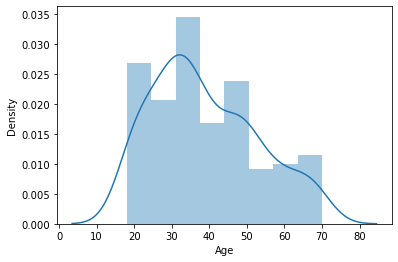

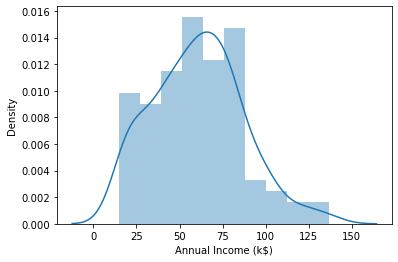

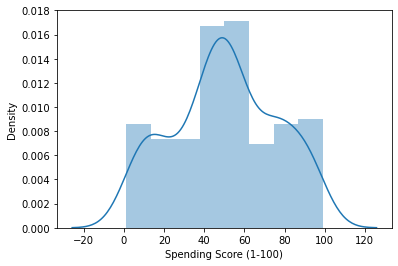

In [5]:
cols=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in cols:
    plt.figure()
    sns.distplot(df[i])

In [6]:
# Analysis based on gender

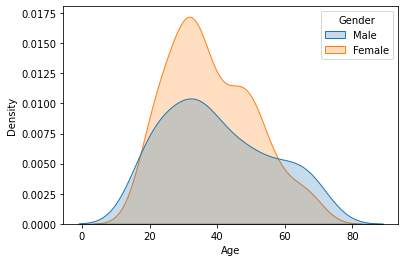

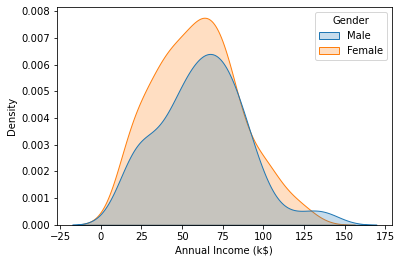

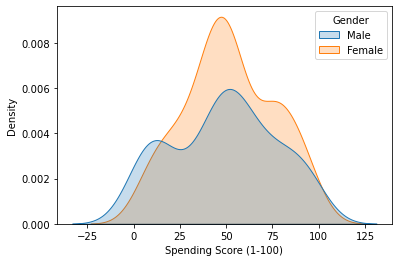

In [7]:
for i in cols:
    plt.figure()
    sns.kdeplot(df[i],shade=True,hue=df['Gender'])

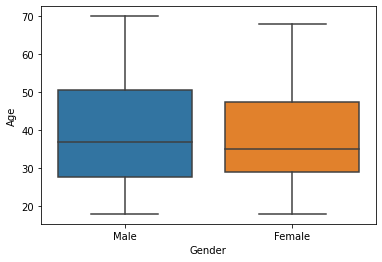

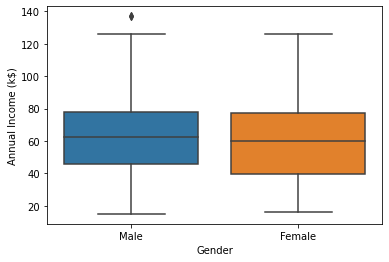

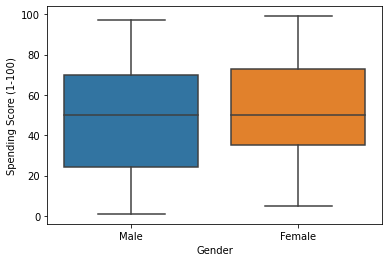

In [8]:
for i in cols:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=i)

# Bivariate Ananlysis

In [9]:
df1=df.drop('CustomerID',axis=1)

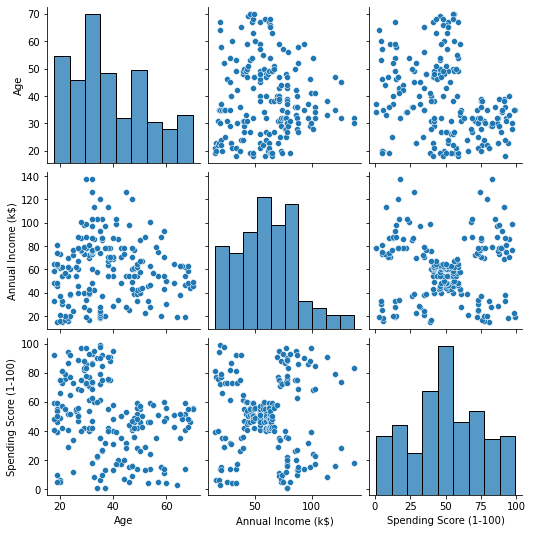

In [10]:
sns.pairplot(df1)

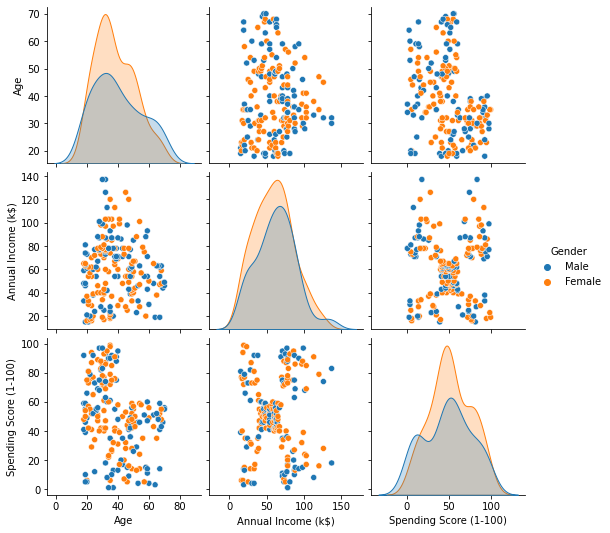

In [11]:
sns.pairplot(df1,hue='Gender')

In [12]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [13]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

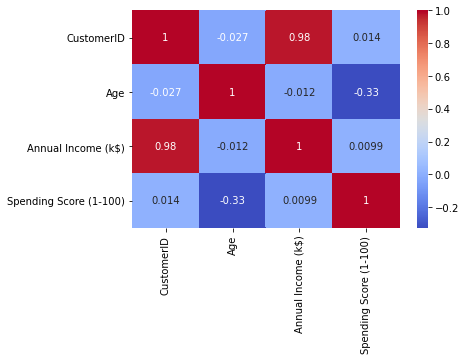

In [14]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# Clustering - Univariate, Multivariate

In [15]:
clust1= KMeans()

In [16]:
# Clustering Based on Annual Income

In [17]:
clust1.fit(df[['Annual Income (k$)']])

KMeans()

In [18]:
clust1.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5,
       5, 5])

In [19]:
df['income cluster']=clust1.labels_

In [20]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,3
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3


In [21]:
df['income cluster'].value_counts()

0    40
4    36
3    32
7    28
1    26
6    18
2    14
5     6
Name: income cluster, dtype: int64

In [22]:
# finding the optimum number of clusters
# use of success metric called inertia

In [23]:
clust1.inertia_

2827.308424908427

In [24]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [25]:
inertia_scores

[137277.2800000002,
 48660.88888888887,
 23528.152173913048,
 13278.112713472474,
 8481.49619047619,
 5050.904761904766,
 3949.275613275612,
 2857.4416971916967,
 2168.478715728716,
 1776.8989843489842]

Text(0, 0.5, 'Inertia Scores')

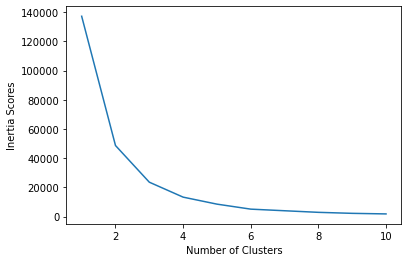

In [26]:
plt.plot(range(1,11),inertia_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Scores')

In [27]:
# THe above plot tells us the minimum number of 
# clusters at which the inertia appreciably decreased
# i.e, n_clusters=3

In [28]:
clust1= KMeans(n_clusters=3)

In [29]:
clust1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [30]:
df['income cluster']=clust1.labels_
df['income cluster'].value_counts()

2    90
0    74
1    36
Name: income cluster, dtype: int64

In [31]:
#Analysing the mean age, annual income and spending score in each cluster

In [32]:
df.groupby('income cluster')['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
income cluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


<AxesSubplot:xlabel='income cluster', ylabel='Annual Income (k$)'>

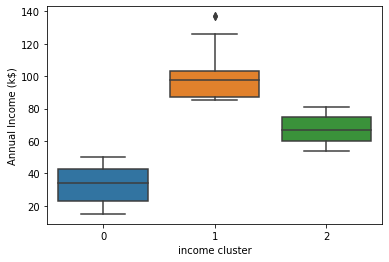

In [33]:
sns.boxplot(data=df,x='income cluster',y='Annual Income (k$)')

<AxesSubplot:xlabel='income cluster', ylabel='Spending Score (1-100)'>

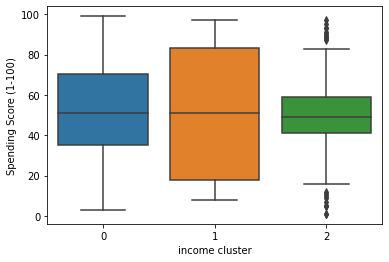

In [34]:
sns.boxplot(data=df,x='income cluster',y='Spending Score (1-100)')

# Bivariate Clustering

In [35]:
clust2=KMeans()
clust2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending score + income cluster']=clust2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,Spending score + income cluster
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,5
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,5
4,5,Female,31,17,40,0,3


In [36]:
# Finding the optimum number of clusters

In [37]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

Text(0, 0.5, 'Inertia Scores')

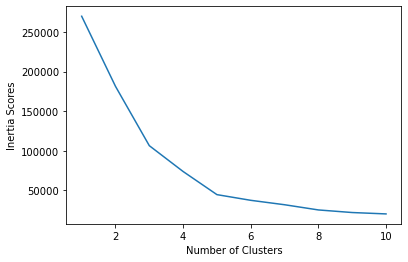

In [38]:
plt.plot(range(1,11),inertia_scores2)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Scores')

In [39]:
#optimum n_clusters= 5

In [40]:
clust2= KMeans(n_clusters=5)
clust2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending score + income cluster']=clust2.labels_
df['Spending score + income cluster'].value_counts()

0    81
2    39
3    35
4    23
1    22
Name: Spending score + income cluster, dtype: int64

In [41]:
centers=pd.DataFrame(clust2.cluster_centers_)
centers.columns=['x','y']

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

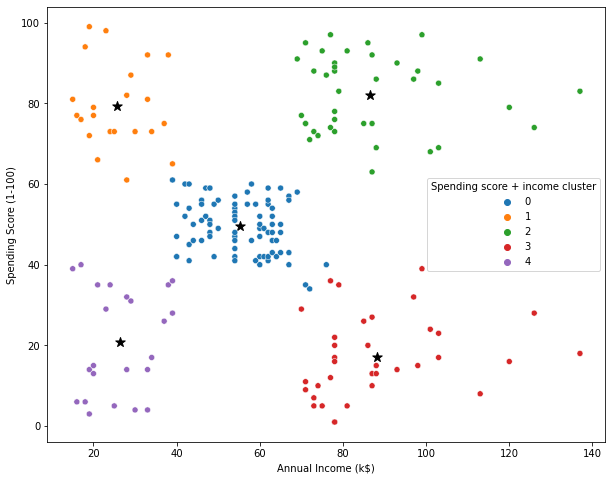

In [42]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending score + income cluster',palette='tab10')

In [43]:
# Analysis

In [44]:
df.groupby('Spending score + income cluster')['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending score + income cluster,,,
0,42.716049,55.296296,49.518519
1,25.272727,25.727273,79.363636
2,32.692308,86.538462,82.128205
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


In [45]:
# Multivariate Clustering

In [46]:
dff=pd.get_dummies(df,drop_first=True)
dff.head()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),income cluster,Spending score + income cluster,Gender_Male
0,1,19,15,39,0,4,1
1,2,21,15,81,0,1,1
2,3,20,16,6,0,4,0
3,4,23,16,77,0,1,0
4,5,31,17,40,0,4,0


In [47]:
dff=dff[['Age','Annual Income (k$)','Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [48]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [49]:
dff=pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [50]:
dff.columns=['Age','Annual Income(k$)','Spending Score (1-100)','Gender_Male']


Text(0, 0.5, 'Inertia Scores')

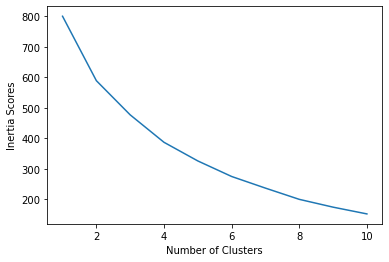

In [51]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff[['Age','Annual Income(k$)','Spending Score (1-100)','Gender_Male']])
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Scores')

In [52]:
clust3=KMeans(n_clusters=4)
clust3.fit(dff[['Age','Annual Income(k$)','Spending Score (1-100)','Gender_Male']])
df['Multivar_cluster']=clust3.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,Spending score + income cluster,Multivar_cluster
0,1,Male,19,15,39,0,4,2
1,2,Male,21,15,81,0,1,2
2,3,Female,20,16,6,0,4,1
3,4,Female,23,16,77,0,1,0
4,5,Female,31,17,40,0,4,1


In [53]:
centers=pd.DataFrame(clust3.cluster_centers_)
centers


,0,1,2,3
0,-0.750475,-0.005017,0.697956,-0.886405
1,0.642568,-0.094987,-0.594940,-0.886405
2,-0.760727,0.054964,0.833693,1.128152
3,0.759830,0.070868,-0.814929,1.128152


In [54]:
df.groupby('Multivar_cluster')['Age','Annual Income (k$)','Spending Score (1-100)','Gender'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Multivar_cluster,,,
0,28.392857,60.428571,68.178571
1,47.803571,58.071429,34.875000
2,28.250000,62.000000,71.675000
3,49.437500,62.416667,29.208333


In [58]:
labels=clust3.labels_
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [69]:
metrics.silhouette_score(dff[['Spending Score (1-100)','Gender_Male']], labels, metric='euclidean')

0.36338082901596264